In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import IPython
from IPython import display


In [3]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade folium


Note: you may need to restart the kernel to use updated packages.


In [5]:
store = pd.read_csv('C:\\Users\\BCCL\\Downloads\\SampleSuperstore.csv')

In [6]:
store.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Cleaning Data: (Removing Null and Duplicate Rows)

In [9]:
null_counts = store.isnull().sum(axis=1).sum(axis=0)
null_counts


0

In [10]:
duplicate_counts = store.duplicated().sum()
duplicate_counts

17

In [11]:
mask = store.duplicated()

# Filter the DataFrame to show only duplicate rows
duplicate_rows = store[mask]
duplicate_rows.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780


In [12]:
store = store.drop_duplicates()
duplicate_counts = store.duplicated().sum()
duplicate_counts


0

In [13]:
store['Profit_Percentage'] = (store['Profit'] / (store['Sales'])) * 100
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Percentage
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


Breaking down Categorical Columns

In [168]:
store.dtypes

Ship Mode             object
Segment               object
Country               object
City                  object
State                 object
Postal Code            int64
Region                object
Category              object
Sub-Category          object
Sales                float64
Quantity               int64
Discount             float64
Profit               float64
Profit_Percentage    float64
dtype: object

In [14]:
label_counts = store['Ship Mode'].value_counts()
label_counts

Ship Mode
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: count, dtype: int64

In [15]:
label_counts = store['Segment'].value_counts()
label_counts

Segment
Consumer       5183
Corporate      3015
Home Office    1779
Name: count, dtype: int64

In [16]:
label_counts = store['State'].value_counts()
label_counts

State
California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

In [17]:
label_counts = store['Quantity'].value_counts()
label_counts

Quantity
3     2400
2     2399
5     1230
4     1186
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: count, dtype: int64

In [18]:
label_counts = store['Discount'].value_counts()
label_counts

Discount
0.00    4787
0.20    3653
0.70     418
0.80     299
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

In [19]:
label_counts = store['Category'].value_counts()
label_counts

Category
Office Supplies    6012
Furniture          2118
Technology         1847
Name: count, dtype: int64

Analyzing Numerical Columns:

In [20]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Profit_Percentage
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013,12.011354
std,32058.266816,623.721409,2.226657,0.206455,234.45784,46.663769
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,23223.000000,17.300000,2.000000,0.000000,1.72620,7.500000
50%,55901.000000,54.816000,3.000000,0.200000,8.67100,27.000000
75%,90008.000000,209.970000,5.000000,0.200000,29.37200,36.250000
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600,50.000000


Ship Mode Analysis:

We begin our analysis by checking how sales and profits distributed across Ship Modes

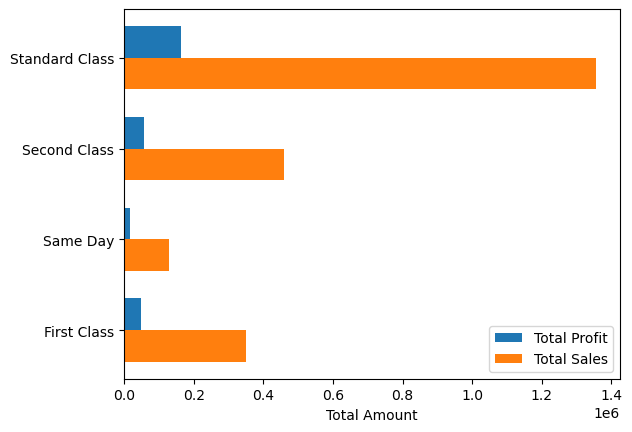

In [77]:
grouped = store.groupby('Ship Mode').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a grouped horizontal bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(grouped))

profit_bars = ax.barh([i + bar_width for i in index], grouped['Profit'], bar_width, label='Total Profit')
sales_bars = ax.barh(index, grouped['Sales'], bar_width, label='Total Sales')

ax.set_xlabel('Total Amount')
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(grouped['Ship Mode'])
ax.legend()

plt.show()

Segment based Analysis:

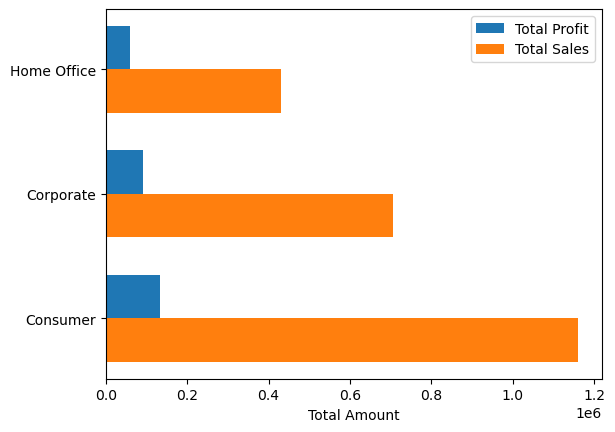

In [79]:
grouped = store.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a grouped horizontal bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(grouped))

profit_bars = ax.barh([i + bar_width for i in index], grouped['Profit'], bar_width, label='Total Profit')
sales_bars = ax.barh(index, grouped['Sales'], bar_width, label='Total Sales')

ax.set_xlabel('Total Amount')
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(grouped['Segment'])
ax.legend()

plt.show()

Sales Distribution:

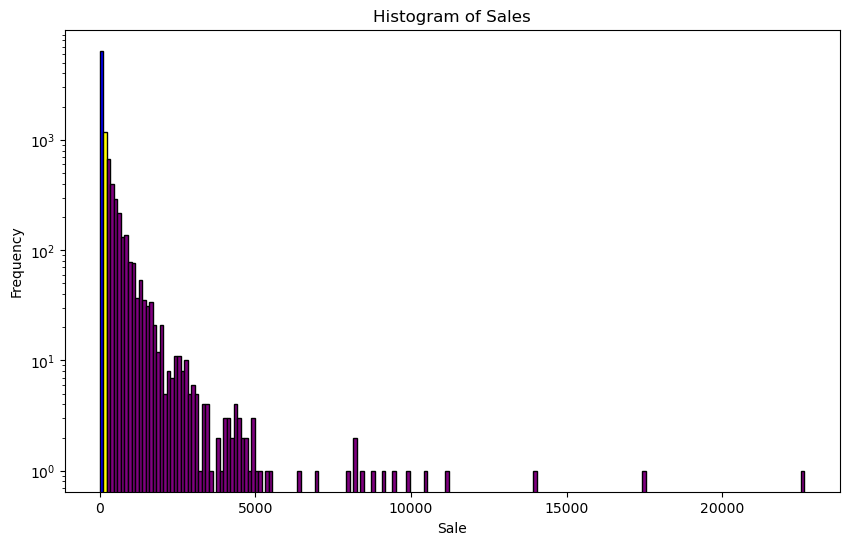

In [85]:
quartiles = store['Sales'].quantile([0.25, 0.5, 0.75])
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(store['Sales'], bins=200, edgecolor='black')

for i in range(len(patches)):
    if bins[i] < quartiles[0.25]:
        patches[i].set_facecolor('blue')
    elif bins[i] < quartiles[0.5]:
        patches[i].set_facecolor('green')
    elif bins[i] < quartiles[0.75]:
        patches[i].set_facecolor('yellow')
    else:
        patches[i].set_facecolor('purple')

plt.yscale('log')
plt.xlabel('Sale')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')

# Display the plot
plt.show()

Around 75% of stores have sales less than 500. The interesting aspect is that the last quartile of stores have a huge variation in sales- from around 1000 to some of the stores having sales greated than 15000.
There are a few stores therefore with very high sales and most with smaller.

Distribution of Profit:

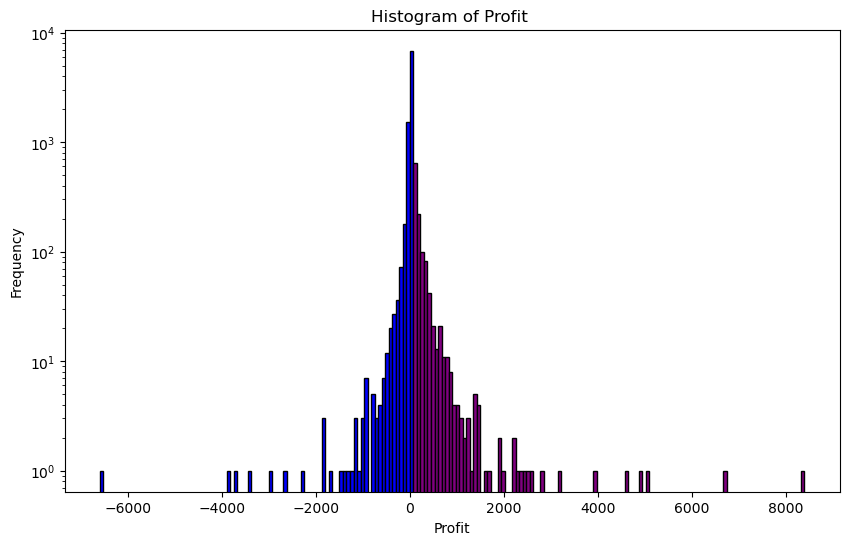

In [163]:
quartiles = store['Profit'].quantile([0.25, 0.5, 0.75])
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(store['Profit'], bins=200, edgecolor='black')

for i in range(len(patches)):
    if bins[i] < quartiles[0.25]:
        patches[i].set_facecolor('blue')
    elif bins[i] < quartiles[0.5]:
        patches[i].set_facecolor('green')
    elif bins[i] < quartiles[0.75]:
        patches[i].set_facecolor('yellow')
    else:
        patches[i].set_facecolor('purple')

plt.yscale('log')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit ')

# Display the plot
plt.show()

This tells us that the middle 50% of stores roughly break even with no huge absolute profit sums. The first quartile has a huge variation of losses from small losses all the way to 6000. The last quartile has a similar almost symmetric variation of profits.

Analysis of Profit Percentage:

Since absolute sales and absolute profits do not tell the true story of how well stores are doing, we calcute the profit percentage as profit/sales.

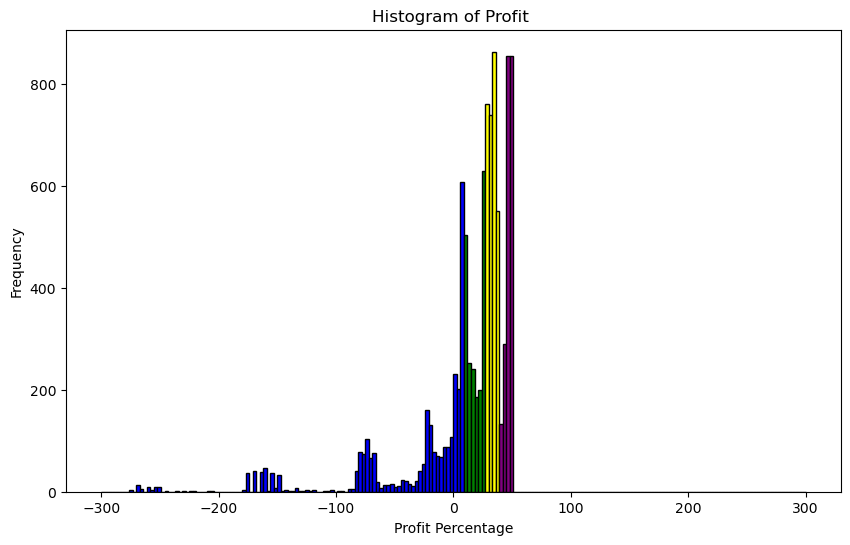

In [92]:
quartiles = store['Profit_Percentage'].quantile([0.25, 0.5, 0.75])
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(store['Profit_Percentage'], bins=200, edgecolor='black', range=(-300,300))

for i in range(len(patches)):
    if bins[i] < quartiles[0.25]:
        patches[i].set_facecolor('blue')
    elif bins[i] < quartiles[0.5]:
        patches[i].set_facecolor('green')
    elif bins[i] < quartiles[0.75]:
        patches[i].set_facecolor('yellow')
    else:
        patches[i].set_facecolor('purple')

plt.xlabel('Profit Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Profit ')

# Display the plot
plt.show()

The top 25% of stores have profit greater than 50%.  About half of the stores are concentrated between 10 and 40% profits. Thus about 75% of stores are in profit as we understood even from the histogram of profits. The last quartile of stores have huge variability in losses, with many stores incurring losses of even 200%.

Discount Analysis:

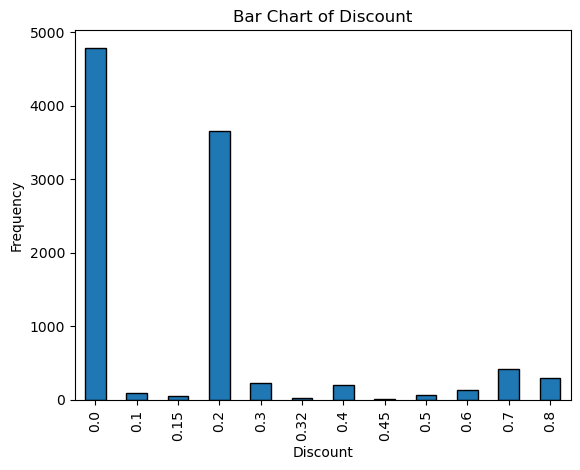

In [111]:
discount_counts = store['Discount'].value_counts()
discount_counts= discount_counts.sort_index()

# Plot bar chart for the 'Discount' column
discount_counts.plot(kind='bar', edgecolor='black')

# Add labels and title
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Bar Chart of Discount')

# Display the plot
plt.show()

We want to see how discounts are related to to profits and sales.

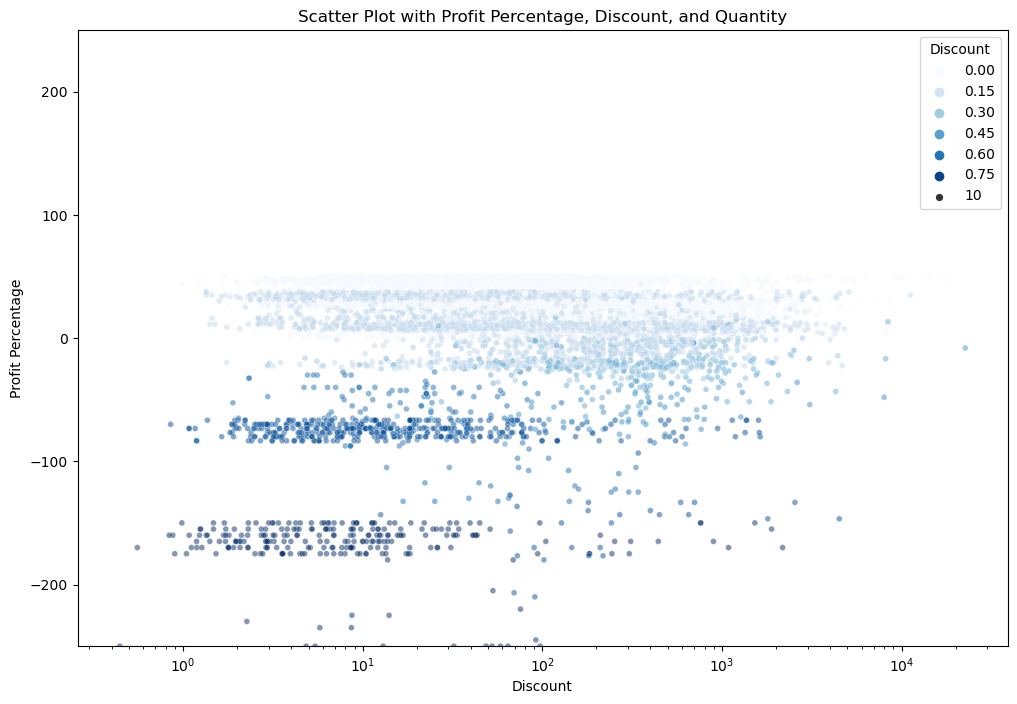

In [158]:



df = store.copy()

# Adjust discount based on category
df.loc[df['Category'] == 'Technology', 'Discount'] += 0.005
df.loc[df['Category'] == 'Office Supplies', 'Discount'] += 0.01

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, y='Profit_Percentage', x='Sales', size=10, hue='Discount', palette= 'Blues', alpha=0.5)

# Add labels and title
plt.xlabel('Discount')
plt.xscale('log')
plt.ylabel('Profit Percentage')
plt.title('Scatter Plot with Profit Percentage, Discount, and Quantity')
plt.ylim(-250,250)
plt.show()


The darker dots are to the bottom of the plot and the lighter ones at the top. Most of the stores offering high discounts report huge losses.

With an understanding of how our values of distributed, we begin analysis based on:
    1-Region
    2-States
    3-Categories
    4- Sub-Categories
    5-Cities
We also study correlations between these parameters.
    

1- Region wise analysis:

In [ ]:
merged_df = pd.merge(store, groupedstate, on='State')

# Select rows where the condition is True and the reading is less than 0
store_low = merged_df[(merged_df['Average']<0)]

store_low=store_low.iloc[:, :-3]
store_low

We begin with trying to gain a rough idea of how sales and profits are distributed among regions of USA

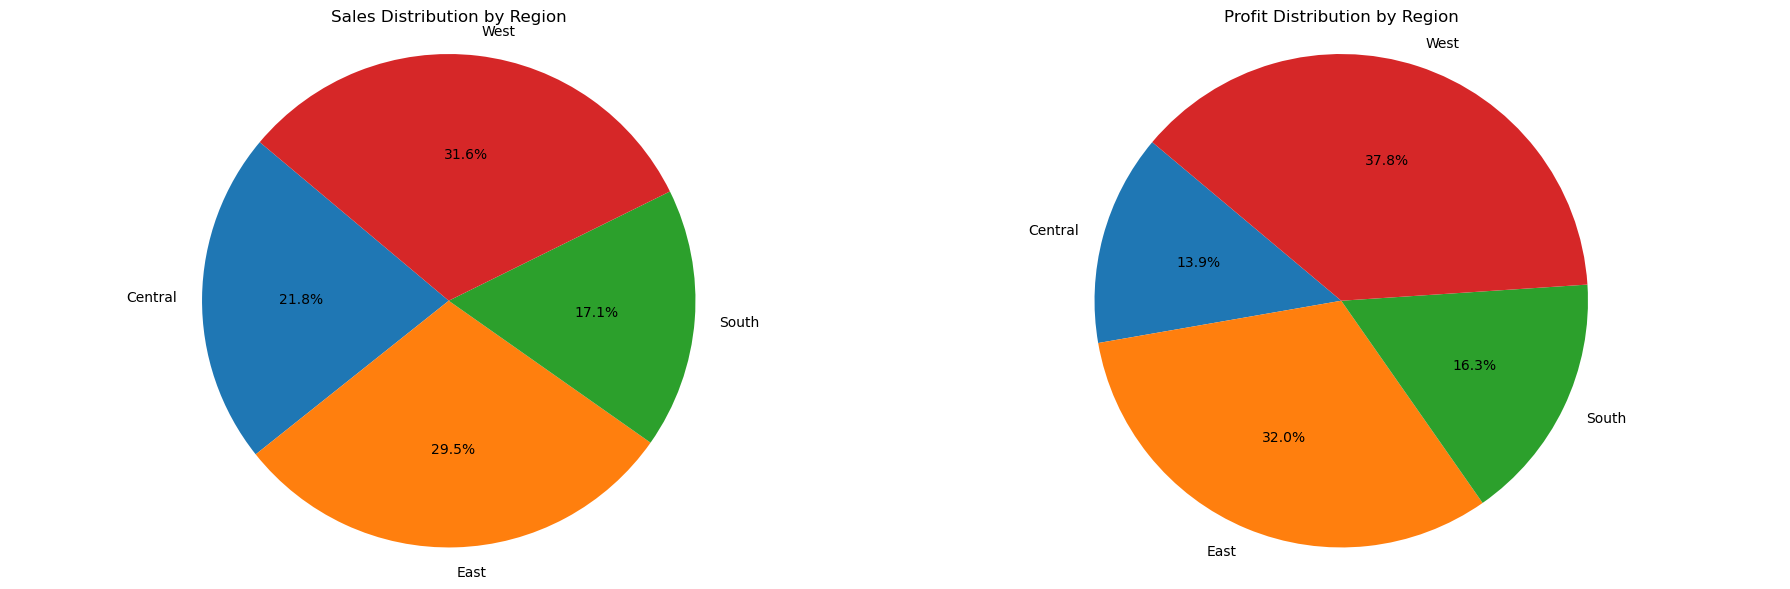

In [21]:
import matplotlib.pyplot as plt

# Group by region and calculate total sales
region_sales = store.groupby('Region')['Sales'].sum()

# Plotting
import matplotlib.pyplot as plt

# Group by region and calculate total profit
region_profit = store.groupby('Region')['Profit'].sum()

# Plotting
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Sales Distribution by Region')

plt.subplot(1, 2, 2)
plt.pie(region_profit, labels=region_profit.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Profit Distribution by Region')

plt.tight_layout()
plt.show()


East and West have largest contributions to total sales and profit. 

This pie chart of net contribution does not help us identify any weak zones or patterns. We move on to scatter plots shaded by region

In [ ]:
grouped1 = store_low.groupby(['State', 'Category'])['Profit_Percentage'].agg(['sum', 'count']).reset_index()

# Calculate the average value in each region
grouped1['Average'] = grouped1['sum'] / grouped1['count']
grouped1= grouped1.sort_values(by='Average')
grouped1

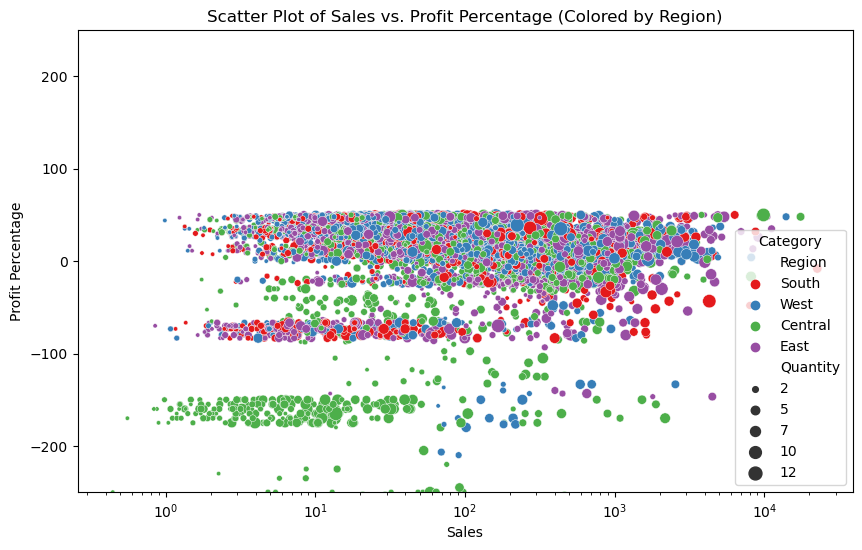

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store, x='Sales', y='Profit_Percentage', hue='Region', palette='Set1',size='Quantity', sizes=(10, 100))
plt.xlabel('Sales')
plt.ylabel('Profit Percentage')
plt.xscale('log')
plt.ylim(-250, 250)  
plt.title('Scatter Plot of Sales vs. Profit Percentage (Colored by Region)')
plt.legend(title='Category')
plt.show()


There is a belt of points with around 200% losses and low sales belonging to the central region- indicating it is a region of interest. This is the obvious analysis. For the other regions the insights are not so obvious. We go to analysis of averages to find other regions of interest and corroborate our hypothesis of central region being a weak zone.

To make it more refined we look at profit percentages and sales of regions through the prism of categories. This makes our analysis 2 dimensional- not only do we get weak regions but we also can find out if a region with net profit has particular categories of stores under performing. We also are able to prepare some hypothesis for our analysis of categories further on.

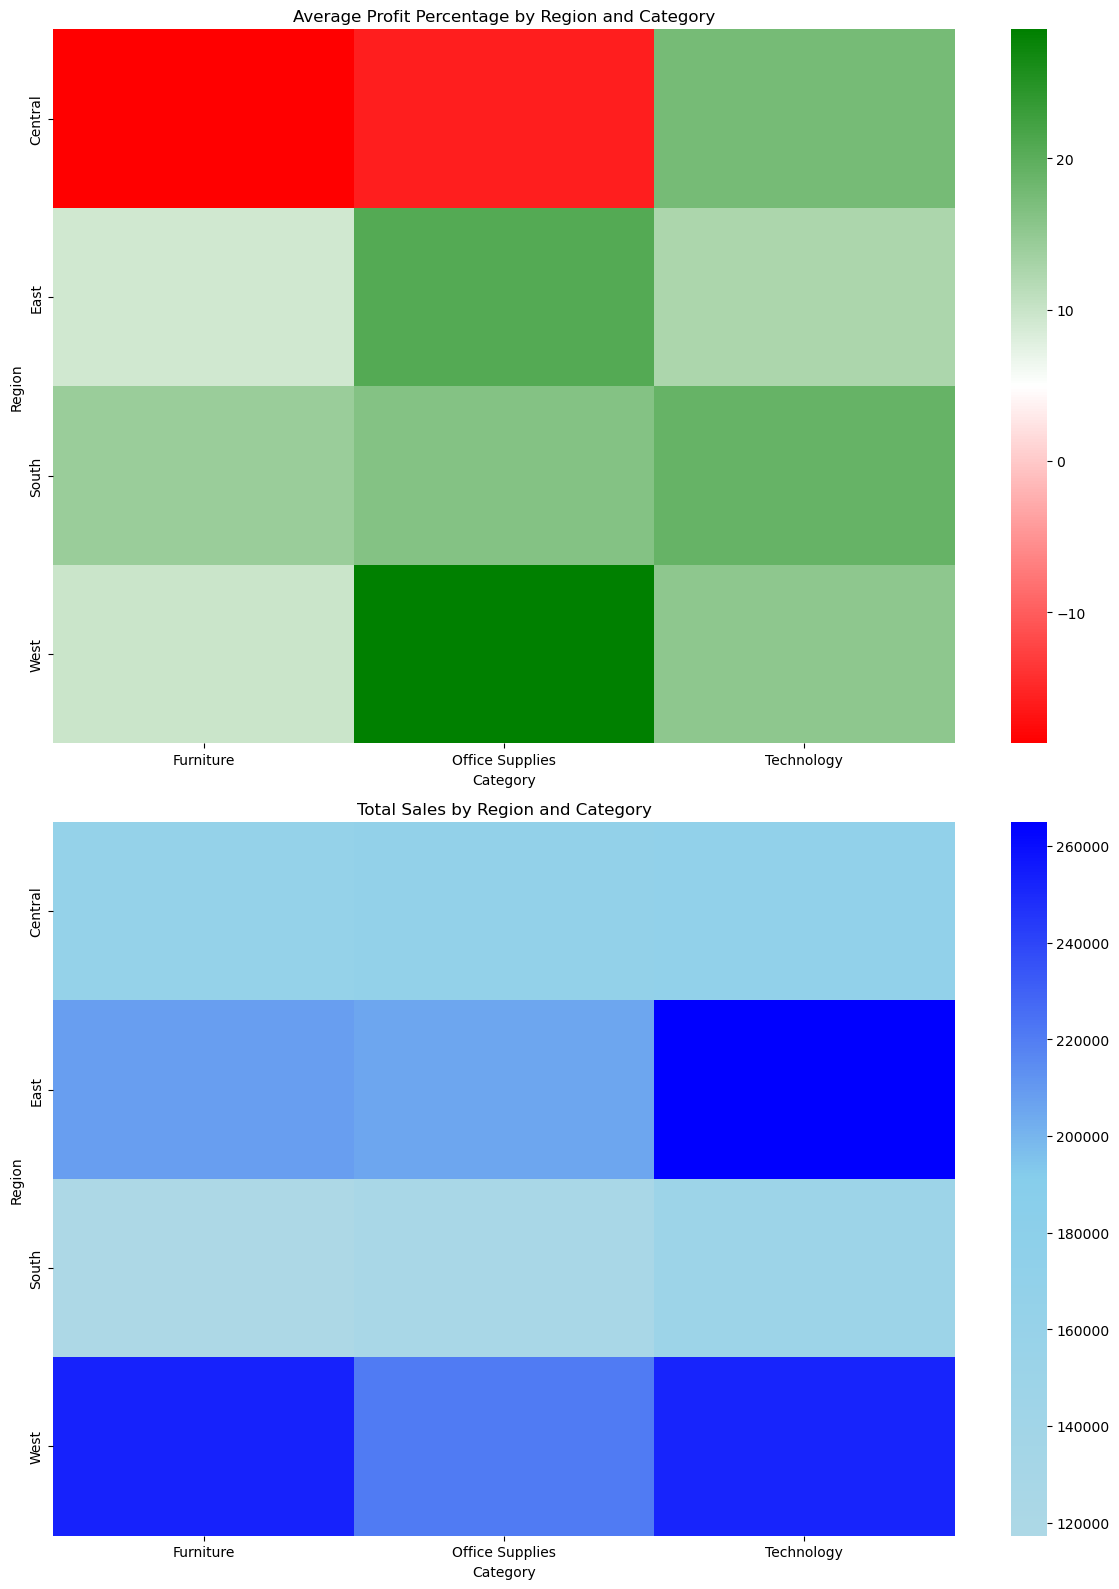

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap for profit percentage with red for negative and green for positive
colors_profit = [(0, 'red'), (0.5, 'white'), (1, 'green')]
cmap_profit = LinearSegmentedColormap.from_list('custom_profit', colors_profit)

# Define custom colormap for total sales with shades of blue
colors_sales = [(0, 'lightblue'), (0.5, 'skyblue'), (1, 'blue')]
cmap_sales = LinearSegmentedColormap.from_list('custom_sales', colors_sales)

# Create pivot tables for average profit percentage and total sales
pivot_profit = store.pivot_table(index='Region', columns='Category', values='Profit_Percentage', aggfunc='mean')
pivot_sales = store.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum')

# Create a figure with two subplots stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Plot the average profit percentage heatmap
sns.heatmap(pivot_profit, cmap=cmap_profit, ax=axes[0])
axes[0].set_title('Average Profit Percentage by Region and Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Region')

# Plot the total sales heatmap
sns.heatmap(pivot_sales, cmap=cmap_sales, ax=axes[1])
axes[1].set_title('Total Sales by Region and Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Region')

# Adjust the layout
plt.tight_layout()
plt.show()


Our hypothesis that central zone is weak is validated. The advantage of using heatmaps is now we also know which categories of stores(Furniture and Office Supplies) are incurring major losses in this region. Other regions have net profit percentage as positive which is why they are not analyzed further. One insight from the sales heatmap is that there need to be higher sales in the South region. 

State Analysis:

We know look into state wise profits and sales. The analysis is performed without any bias of the previous region analysis- however if our methods are solid we should have at least some states identified as weak belonging to the central zone.

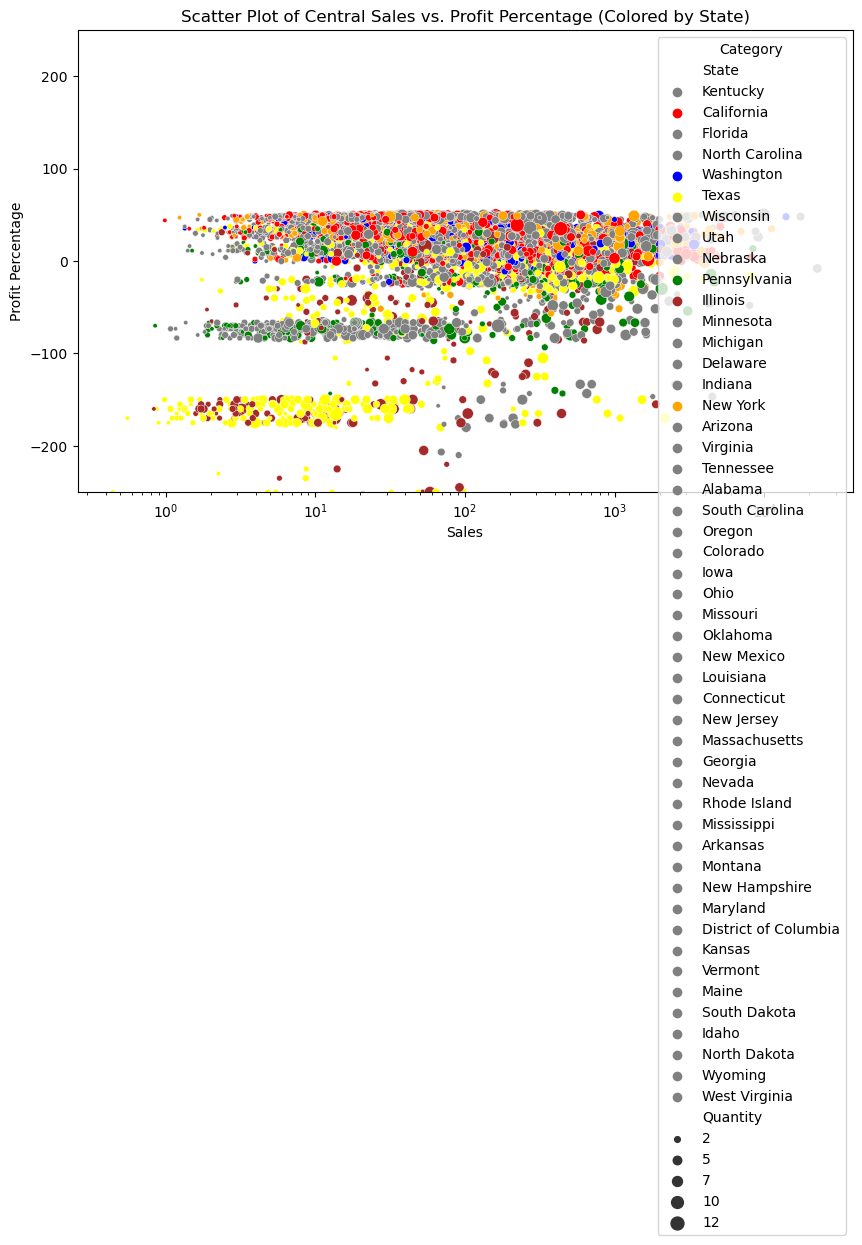

In [94]:
store_subcat = store

# Find the top 5 states with the most number of dots
top_states = store_subcat['State'].value_counts().nlargest(5).index.tolist()

# Create a custom color palette
custom_palette = {state: 'red' if state == top_states[0] else 'orange' if state == top_states[1] else 'yellow' if state == top_states[2] else 'green' if state == top_states[3] else 'blue' if state == top_states[4] else 'brown' if state == 'Illinois' else 'gray' for state in store_subcat['State'].unique()}

# Create a scatter plot with custom colors for the top 5 states
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_subcat, x='Sales', y='Profit_Percentage', hue='State', palette=custom_palette, size='Quantity', sizes=(10, 100))
plt.xlabel('Sales')
plt.ylabel('Profit Percentage')
plt.xscale('log')
plt.ylim(-250, 250)  
plt.title('Scatter Plot of Central Sales vs. Profit Percentage (Colored by State)')
plt.legend(title='Category')
plt.show()


The initial observations are a lot of yellow and brown dots in the bottom and left zones of the scatter plot. Texas and Illnois are therefore potential weak states. Let us analyze averages to validate this.

In [166]:
grouped = store.groupby('State')['Profit_Percentage'].agg(['sum', 'count']).reset_index()

# Calculate the average value in each region
grouped['Average'] = grouped['sum'] / grouped['count']
grouped= grouped.sort_values(by='Average')


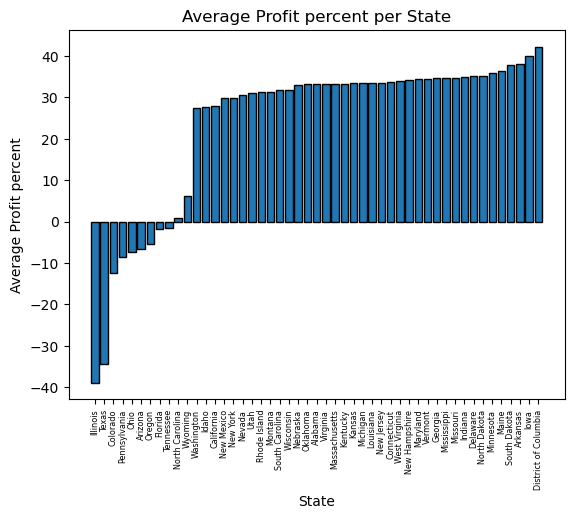

In [104]:

# Plot the average values for each region
plt.bar(groupedstate['State'], groupedstate['Average'], edgecolor='black')
plt.xlabel('State')
plt.xticks(rotation=90, fontsize='xx-small')
plt.ylabel('Average Profit percent')
plt.title('Average Profit percent per State')
plt.show()

Our hypothesis that Texas and Illinois are the worst performing states is validated. We have Colarado, Pennsylvania, Ohio and Arizona as states with net losses. However these losses are small compared to Texas and Illnois which are the states we identify as weak.

We know should check if our state analysis and region analysis roughly point to the same direction. 

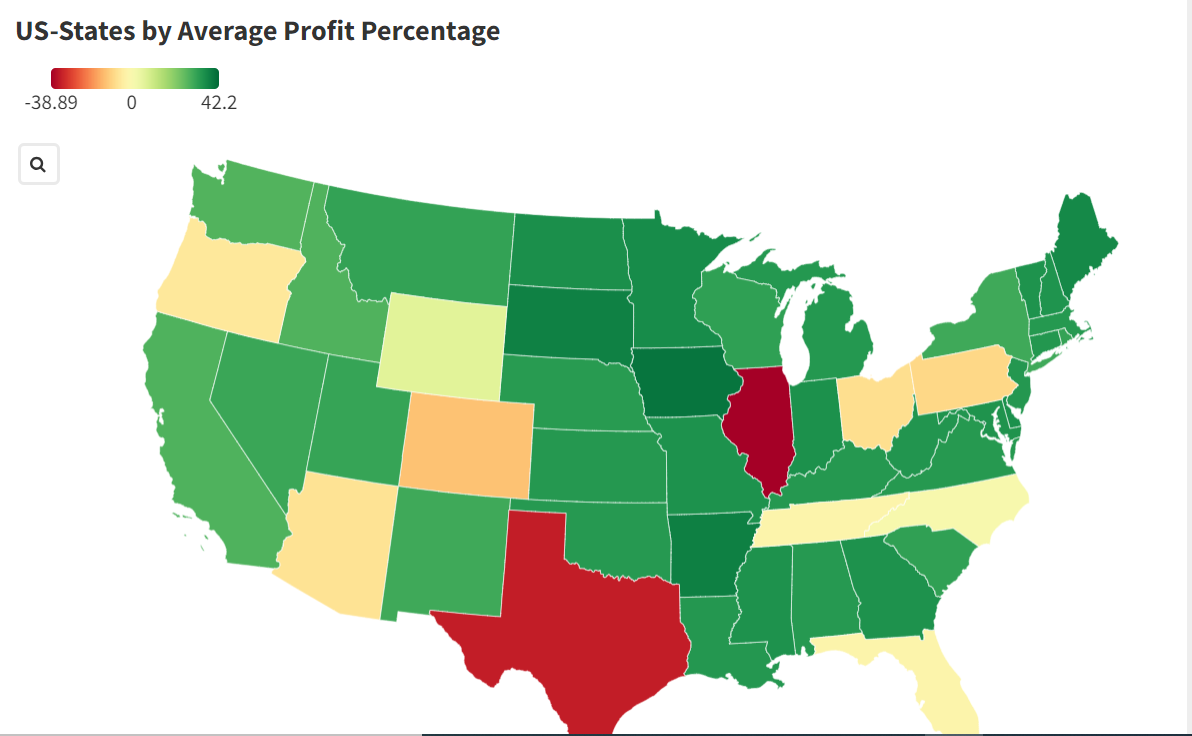

In [178]:
display.Image("C:\\Users\\BCCL\\Desktop\\ans.png")

The states with maximum losses belong to central zone.
This double checks our inference from the region wise analysis.

Our final state based analysis involves discount values. These are a beginning point to any overhauls/changes that store owners may be interested in.

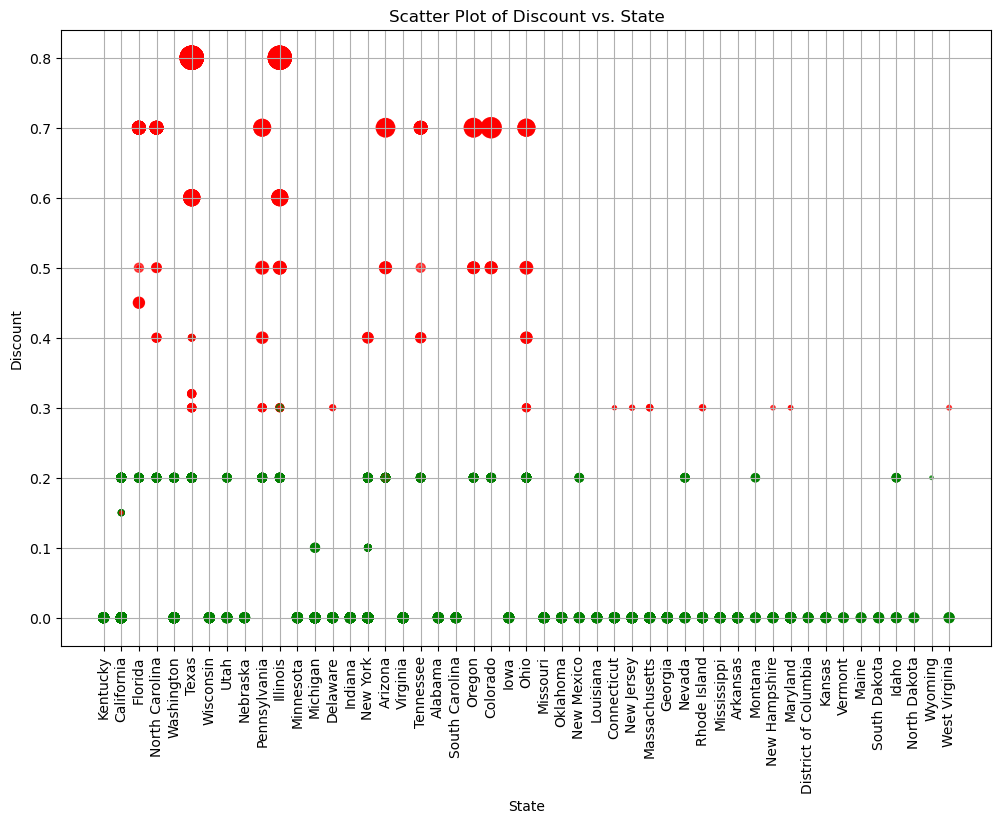

In [161]:
colors = np.where(store['Profit_Percentage'] < 0, 'r', 'g')  # Red if profit < 0, green otherwise
sizes = store['Profit_Percentage'].abs() # Size based on the absolute value of profit %

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(store['State'], store['Discount'], c=colors, s=sizes, alpha=0.7)

# Customize plot
plt.title('Scatter Plot of Discount vs. State')
plt.xlabel('State')
plt.xticks(rotation=90)  
plt.ylabel('Discount')
plt.grid(True)

# Show plot
plt.show()

Texas and Illinois have large red dots at the very top of the chart. As we observed initially, high loss stores invariably have high discounts offered. We add another subtlety now- high loss states also have stores offering high discounts. Other states with red dots at the top can be analyzed further.

Category Analysis:

From our heatmaps between region and category we have a rough idea that the categories of interest are Furniture and Office Supplies. Here we begin an independent analysis to see if we reach other conclusions and whether this one is correct.

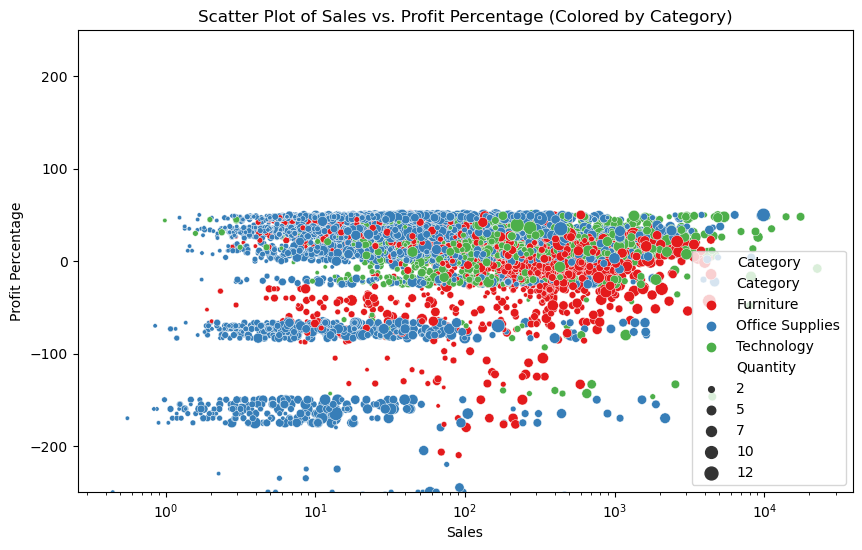

In [215]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store, x='Sales', y='Profit_Percentage', hue='Category', palette='Set1',size='Quantity', sizes=(10, 100))
plt.xlabel('Sales')
plt.ylabel('Profit Percentage')
plt.xscale('log')
plt.ylim(-250, 250)  
plt.title('Scatter Plot of Sales vs. Profit Percentage (Colored by Category)')
plt.legend(title='Category')
plt.show()


Office Supplies have 2 belts of low sales and extremely high losses making it a definite category of interest. The green dots(Technology) are neither to the bottom nor very left so they are doing okay. There are substantial red dots scattered all the way to the bottom of the plot hence Furniture stores across America are also of interest to us. 

Sub-Category Analysis:

Office Supplies:

We try to find patterns using scatter plots of Office Supplies stores and identify any obvious weak sub categories.

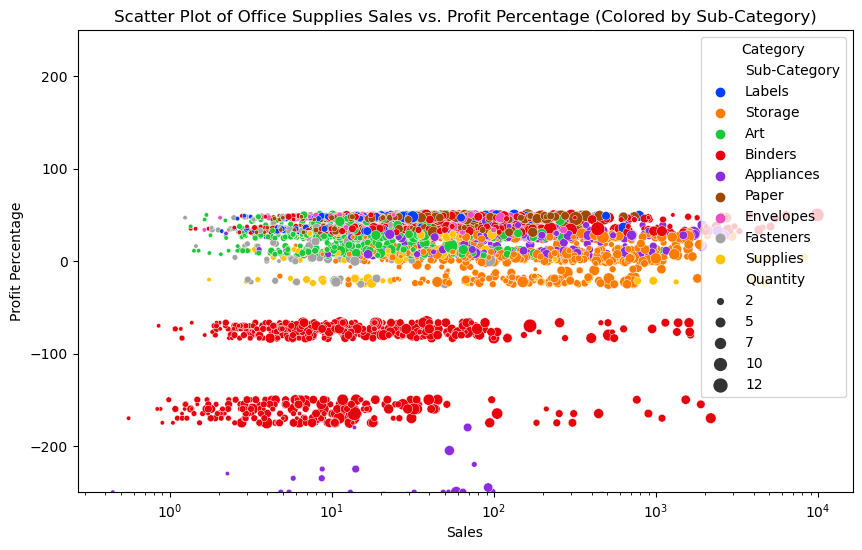

In [105]:
store_cat= store[store['Category']=='Office Supplies']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_cat, x='Sales', y='Profit_Percentage', hue='Sub-Category', palette='bright',size='Quantity', sizes=(10, 100))
plt.xlabel('Sales')
plt.ylabel('Profit Percentage')
plt.xscale('log')
plt.ylim(-250, 250)  
plt.title('Scatter Plot of Office Supplies Sales vs. Profit Percentage (Colored by Sub-Category)')
plt.legend(title='Category')
plt.show()


Red  dots indicate clearly a very high loss subcategory of Office Supply Stores- Binders. They have 100-200% losses in a large number of stores.

Furniture 

We now want to identify weak subcategories for Furniture stores using scatter plots.

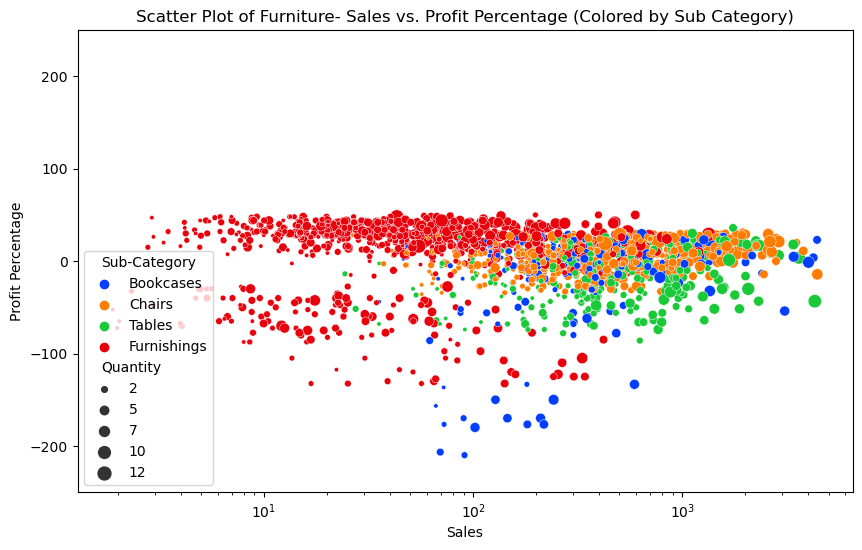

In [106]:
store_cat= store[store['Category']=='Furniture']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_cat, x='Sales', y='Profit_Percentage', hue='Sub-Category', palette='bright',size='Quantity', sizes=(10, 100))
plt.xlabel('Sales')
plt.xscale('log')
plt.ylabel('Profit Percentage')
plt.ylim(-250, 250)  
plt.title('Scatter Plot of Furniture- Sales vs. Profit Percentage (Colored by Sub Category)')
plt.show()


There are some furnishing stores(red dots) with low sales and high losses. There are some book case stores with very high losses. These claims are not very strong due to no clear trend. 

We turn to average profit and sales analysis for categories and sub-categories to gain clearer insights.

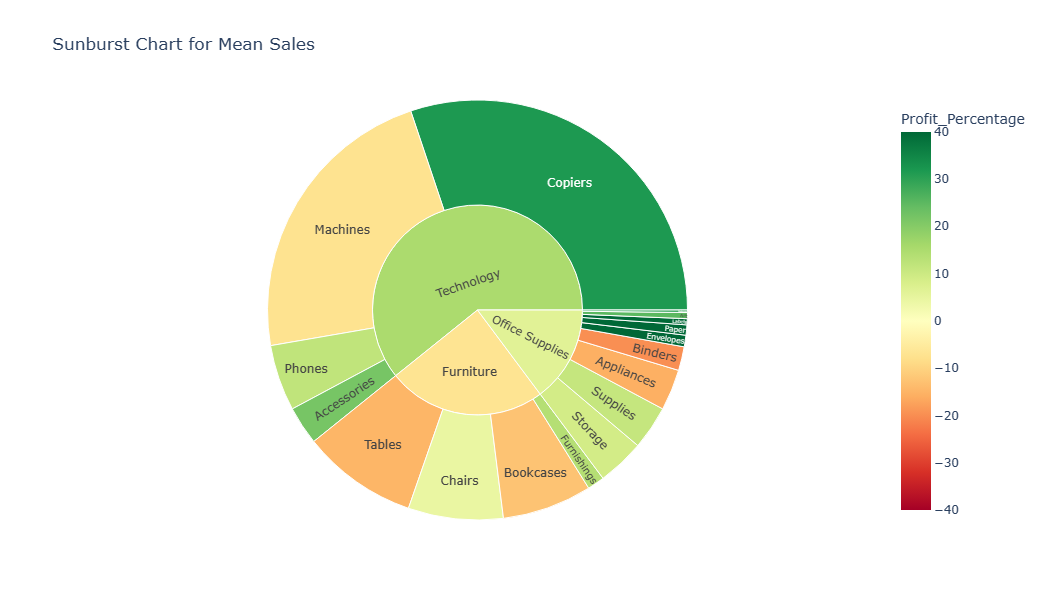

In [70]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame containing Category, Sub-Category, Sales, and Quantity columns

# Calculate mean sales for each category and sub-category
sales_df = store.groupby(['Category', 'Sub-Category']).agg({'Sales': 'mean', 'Profit_Percentage': 'mean'}).reset_index()



# Create sunburst chart for mean sales
fig_sales = px.sunburst(sales_df, path=['Category', 'Sub-Category'], values='Sales',
                        title='Sunburst Chart for Mean Sales', 
                   color='Profit_Percentage', color_continuous_scale=px.colors.diverging.RdYlGn,
                   color_continuous_midpoint=0, range_color=[-40, 40],
                   width=800,
                   height=600)


fig_sales.update_layout(legend=dict(title='Sales Mean'))



# Display the charts side by side
fig_sales.show()


Office Supplies: Our hypothesis that binders stores are high loss enterprises is validated. 
Furniture: Bookcases stores are incurring losses which was a weak hypothesis from the scatter plot. We reject the hypothese that furnishing stores are incurring major losses as the average percentage of profit is positive. 
Technology: Machine stores are incurring mild losses. Since they are high sales stores, this may be an area to analyze.

City Analysis:

Since there are a large number of cities,, we base this analysis based on previous knowledge that Texas and Illnois are weak states. Now we are interested in the weak cities in these 2 states, which can be useful for policy making and implementation

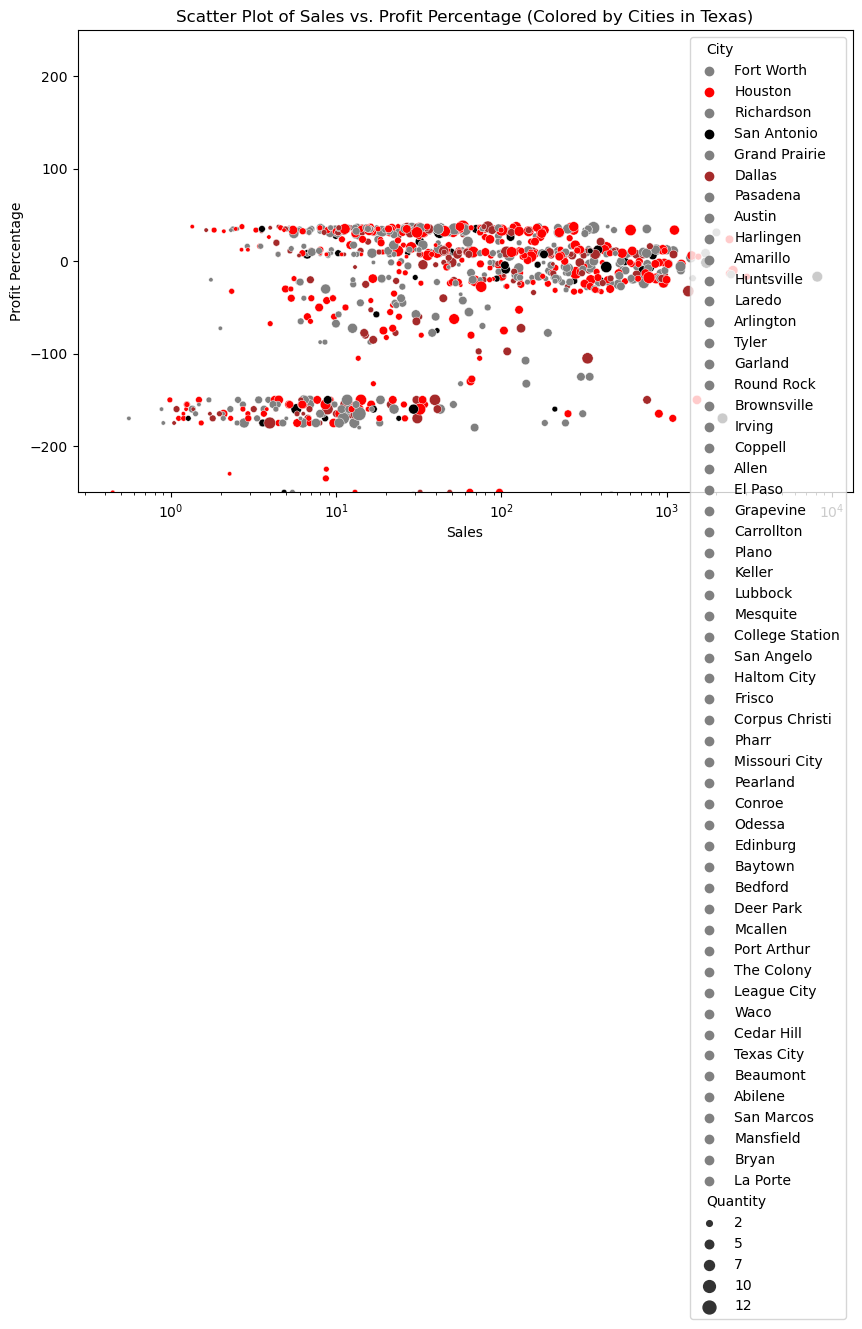

In [169]:

store_tex= store[store['State']=='Texas']
store_tex_less= store_tex[store_tex['Profit_Percentage']<-50]
top_city = store_tex_less['City'].value_counts().nlargest(5).index.tolist()

# Create a custom color palette
custom_palette = {city: 'red' if city == top_city[0] else 'brown' if city == top_city[1] else 'black' if city == top_city[2]  else 'gray' for city in store_tex['City'].unique()}

# Create a scatter plot with custom colors for the top 5 states
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_tex, x='Sales', y='Profit_Percentage', hue='City', palette=custom_palette, size='Quantity', sizes=(10, 100))
plt.xlabel('Sales')
plt.ylabel('Profit Percentage')
plt.xscale('log')
plt.ylim(-250, 250)  
plt.title('Scatter Plot of Sales vs. Profit Percentage (Colored by Cities in Texas)')
plt.show()


For the state of Texas there is a very clear insight- a very large percentage of stores is in the cities of Houston and Dallas. While these have a large number of stores in profit, most of the dots on the bottom of the plot are red and brown in colour- indicating that the high losses of Illnois stores have an explanation in the stores of Houston and Dallas.

In [272]:
store_tex['Region'].value_counts()

Region
Central    983
Name: count, dtype: int64

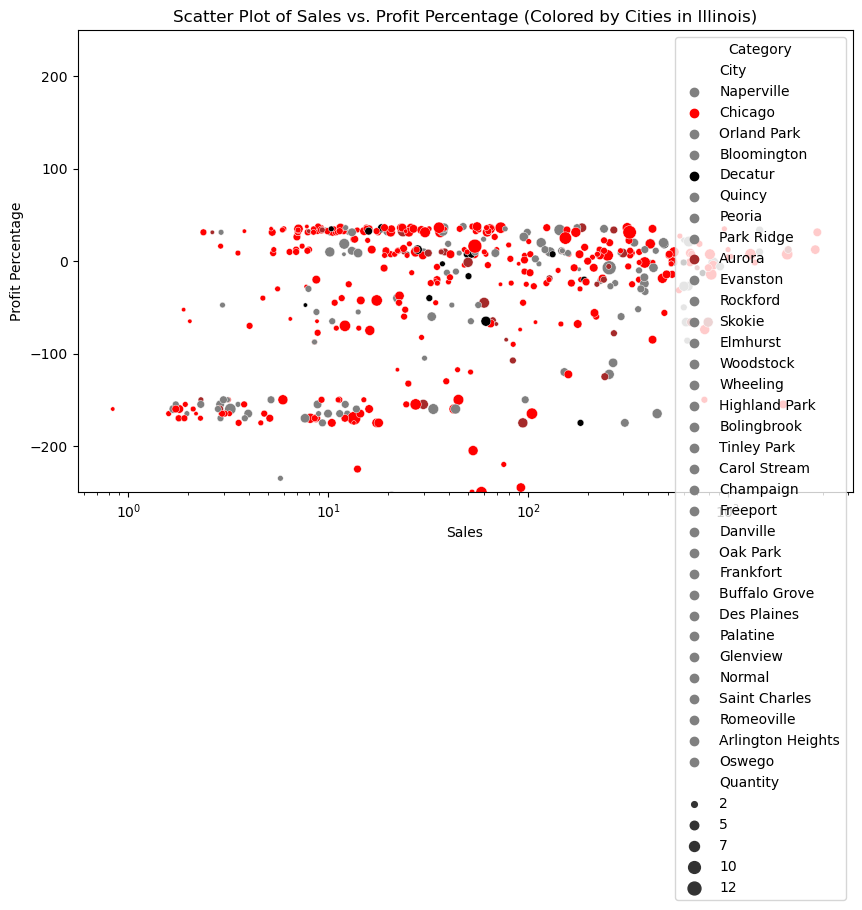

In [109]:

store_tex= store[(store['State']=='Illinois')]
# Find the top 5 states with the most number of dots
top_city = store_tex['City'].value_counts().nlargest(5).index.tolist()

# Create a custom color palette
custom_palette = {city: 'red' if city == top_city[0] else 'brown' if city == top_city[1] else 'black' if city == top_city[2]  else 'gray' for city in store_tex['City'].unique()}

# Create a scatter plot with custom colors for the top 5 states
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_tex, x='Sales', y='Profit_Percentage', hue='City', palette=custom_palette, size='Quantity', sizes=(10, 100))
plt.xlabel('Sales')
plt.ylabel('Profit Percentage')
plt.xscale('log')
plt.ylim(-250, 250)  
plt.title('Scatter Plot of Sales vs. Profit Percentage (Colored by Cities in Illinois)')
plt.legend(title='Category')
plt.show()


For the state of Illnois there is a very clear insight- a very large percentage of stores is in the city of Chicago. While Chicago has a large number of stores in profit, most of the dots on the bottom of the plot are red in colour- indicating that the high losses of Illnois stores have an explanation in the stores of Chicago.